In [3]:
!pip install nltk
import nltk

In [62]:
# download gutenberg and punkt
nltk.download("gutenberg")
nltk.download("punkt")
nltk.download('stopwords')

[nltk_data] Downloading package gutenberg to /home/jovyan/nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!
[nltk_data] Downloading package punkt to /home/jovyan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [5]:
# import the book "Alice in Wonderland" into a variable tokenized
alice = "carroll-alice.txt"
sentences = nltk.corpus.gutenberg.sents(alice)

In [6]:
print(sentences[150])

['As', 'she', 'said', 'this', 'she', 'looked', 'down', 'at', 'her', 'hands', ',', 'and', 'was', 'surprised', 'to', 'see', 'that', 'she', 'had', 'put', 'on', 'one', 'of', 'the', 'Rabbit', "'", 's', 'little', 'white', 'kid', 'gloves', 'while', 'she', 'was', 'talking', '.']


In [7]:
# as the string is already tokenized, let's normalize
word_dictionary = {}
for sentence in sentences:
    for word in sentence:
        if not word in word_dictionary:
            word_dictionary[word] = 1
        else:
            word_dictionary[word] +=1

In [14]:
print(word_dictionary)

{'[': 3, 'Alice': 396, "'": 1732, 's': 195, 'Adventures': 3, 'in': 357, 'Wonderland': 3, 'by': 55, 'Lewis': 1, 'Carroll': 1, '1865': 1, ']': 1, 'CHAPTER': 12, 'I': 543, '.': 764, 'Down': 3, 'the': 1527, 'Rabbit': 45, '-': 141, 'Hole': 1, 'was': 352, 'beginning': 14, 'to': 725, 'get': 44, 'very': 126, 'tired': 7, 'of': 500, 'sitting': 10, 'her': 243, 'sister': 9, 'on': 189, 'bank': 3, ',': 1993, 'and': 802, 'having': 10, 'nothing': 30, 'do': 68, ':': 216, 'once': 31, 'or': 76, 'twice': 5, 'she': 509, 'had': 177, 'peeped': 3, 'into': 67, 'book': 11, 'reading': 3, 'but': 133, 'it': 527, 'no': 69, 'pictures': 4, 'conversations': 1, 'what': 93, 'is': 97, 'use': 18, 'a': 615, ",'": 397, 'thought': 74, 'without': 26, 'conversation': 10, "?'": 154, 'So': 27, 'considering': 3, 'own': 10, 'mind': 9, '(': 50, 'as': 246, 'well': 40, 'could': 73, 'for': 140, 'hot': 7, 'day': 29, 'made': 30, 'feel': 8, 'sleepy': 5, 'stupid': 5, '),': 8, 'whether': 11, 'pleasure': 2, 'making': 8, 'daisy': 1, 'chain':

In [55]:
import pandas as pd
word_df = pd.DataFrame.from_dict(word_dictionary, orient='index')
word_df.sort_values(by=0,inplace=True, ascending=False)

In [56]:
# rank vs. frequency
word_df = word_df.reset_index(drop=False)
word_df.columns = ["Word",'Frequency']

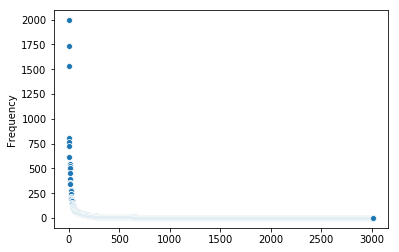

In [59]:
import seaborn as sns
ax = sns.scatterplot(x=range(0,len(word_df)), y="Frequency", data=word_df)

In [60]:
import string
print(string.punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [63]:
from nltk.corpus import stopwords
print(stopwords.words("english"))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [71]:
## Normalization
# everything in lowercase
# remove punctuation
# remove all stopwords

word_dictionary_normalized = {}
for sentence in sentences:
    for word in sentence:
        word = word.lower()
        if word in string.punctuation:
            break
        else:
            if word in stopwords.words("english"):
                break
            else:
                if not word in word_dictionary_normalized:
                    word_dictionary_normalized[word] = 1
                else:
                    word_dictionary_normalized[word] +=1

In [72]:
word_df_norm = pd.DataFrame.from_dict(word_dictionary_normalized, orient='index')
word_df_norm.sort_values(by=0,inplace=True, ascending=False)

In [73]:
word_df_norm.head()

,0
alice,149
said,117
thought,16
cried,15
however,13


In [75]:
# rank vs. frequency
word_df_norm = word_df_norm.reset_index(drop=False)
word_df_norm.columns = ["Word",'Frequency']

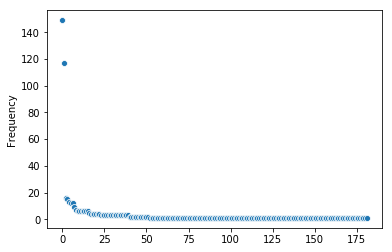

In [76]:
ax = sns.scatterplot(x=range(0,len(word_df_norm)), y="Frequency", data=word_df_norm)